In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import matplotlib.colors as colors
from matplotlib.patches import Circle

In [39]:
def czytajS(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        data = data.T
        return data

In [40]:
def czytajU(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        return data

In [41]:
folder = ''
nazwy = ["V_0", "V_1", "BX_0", "BX_1", "BY_0", "BY_1", "EX_0", "EX_1", "EY_0", "EY_1"]

for n in nazwy :
    plik = f'{n}.txt'
    sciezka = os.path.join(folder, plik)
    if os.path.exists(sciezka):
        print(f"Otwieranie {plik}")
        if n == "V_0" :
            v0 = czytajU(sciezka)
        if n == "V_1" :
            v1 = czytajU(sciezka)
        if n == "EX_0" :
            ex0 = czytajU(sciezka)
        if n == "EX_1" :
            ex1 = czytajU(sciezka)
        if n == "EY_0" :
            ey0 = czytajU(sciezka)
        if n == "EY_1" :
            ey1 = czytajU(sciezka)
        if n == "BX_0" :
            bx0 = czytajU(sciezka)
        if n == "BX_1" :
            bx1 = czytajU(sciezka)
        if n == "BY_0" :
            by0 = czytajU(sciezka)
        if n == "BY_1" :
            by1 = czytajU(sciezka)
    else:
        print(f"nie istnieje.")

Otwieranie V_0.txt
Otwieranie V_1.txt
Otwieranie BX_0.txt
Otwieranie BX_1.txt
Otwieranie BY_0.txt
Otwieranie BY_1.txt
Otwieranie EX_0.txt
Otwieranie EX_1.txt
Otwieranie EY_0.txt
Otwieranie EY_1.txt


In [42]:
v0.size/42

42.0

In [44]:
N = 42
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)

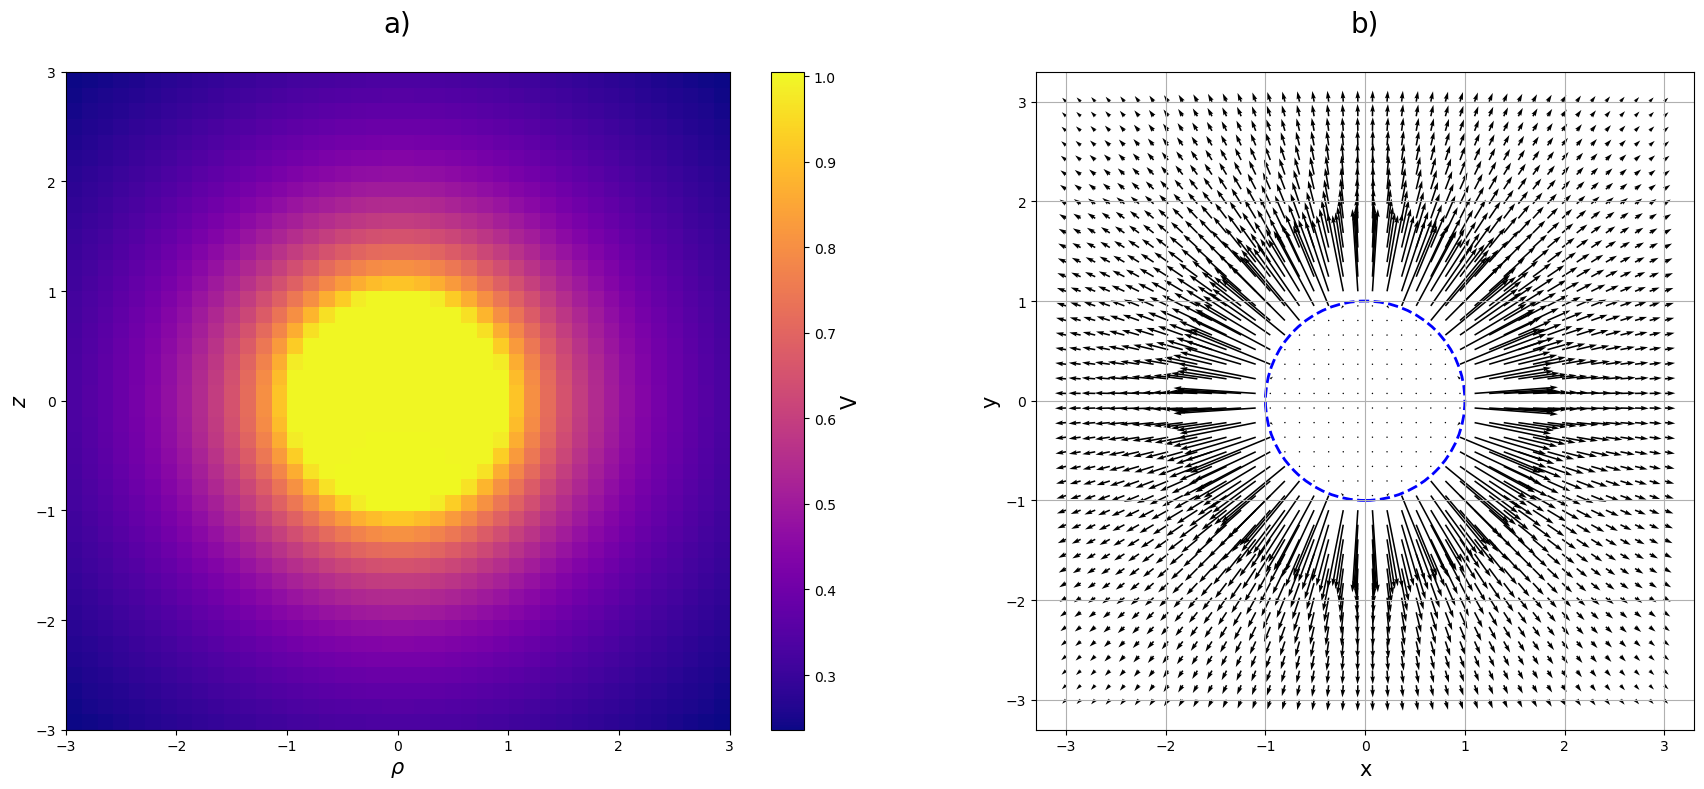

In [52]:
fs = 15
scale = 2  # dla E

U = ex0.T * scale
V = ey0.T * scale
X0 = X 
Y0 = Y 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

im = ax1.imshow(v0, cmap='plasma', extent=[-3, 3, -3, 3], aspect='auto')
cb = fig.colorbar(im, ax=ax1)
cb.set_label('V', fontsize=fs)

ax1.set_xlabel(r"$\rho$", fontsize=fs)
ax1.set_ylabel(r"$z$", fontsize=fs)
ax1.set_title("a)\n", fontsize=fs+5)

ax2.quiver(X0, Y0, U, V, angles='xy', scale_units='xy', scale=2)

circle = Circle((0, 0), 1, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2)
ax2.add_patch(circle)

ax2.set_aspect('equal')
ax2.set_title("b)\n", fontsize=fs+5)
ax2.set_xlabel('x', fontsize=fs)
ax2.set_ylabel('y', fontsize=fs)
ax2.grid(True)

plt.tight_layout()
plt.show()


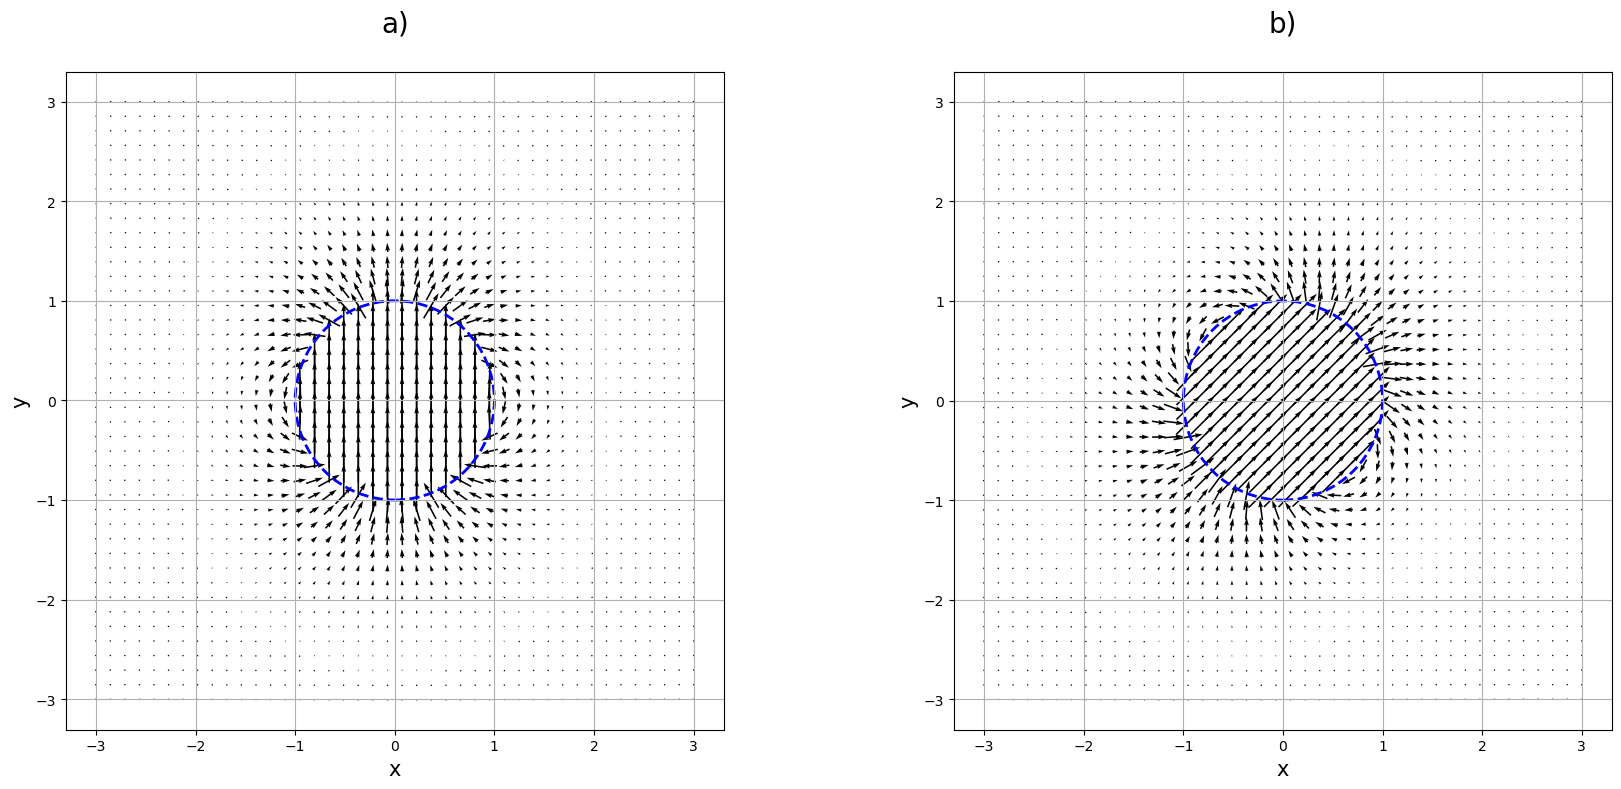

In [53]:
scale = 5       # dla B
# scale = 0.5   # dla E

U = bx0.T * scale
V = by0.T * scale
X0 = X - U / 2
Y0 = Y - V / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.quiver(X0, Y0, U, V, angles='xy', scale_units='xy', scale=1)

circle = Circle((0, 0), 1, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2)
ax1.add_patch(circle)

ax1.set_aspect('equal')
ax1.set_title("a)\n", fontsize=fs+5)
ax1.set_xlabel('x', fontsize=fs)
ax1.set_ylabel('y', fontsize=fs)
ax1.grid(True)


U = bx1.T * scale
V = by1.T * scale
X0 = X - U / 2
Y0 = Y - V / 2

ax2.quiver(X0, Y0, U, V, angles='xy', scale_units='xy', scale=1)

circle = Circle((0, 0), 1, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2)
ax2.add_patch(circle)

ax2.set_aspect('equal')
ax2.set_title("b)\n", fontsize=fs+5)
ax2.set_xlabel('x', fontsize=fs)
ax2.set_ylabel('y', fontsize=fs)
ax2.grid(True)

plt.tight_layout()
plt.show()

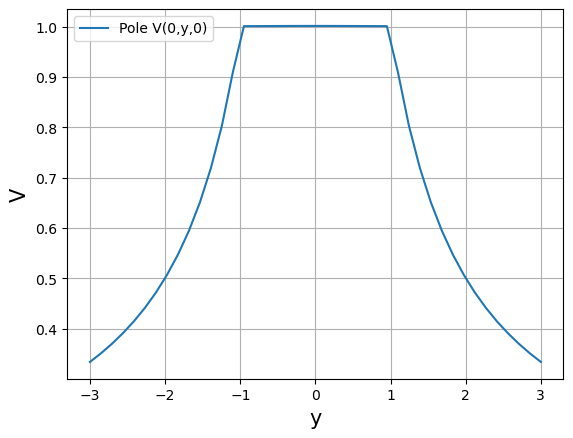

In [80]:
plt.plot(y,(v0[round((N-1)/2)]+v0[round((N-1)/2)+1])/2, label="Pole V(0,y,0)")
plt.xlabel("y", fontsize = fs)
plt.ylabel("V", fontsize = fs)
plt.legend(loc="upper left")
plt.grid()
plt.show()